In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import cordex as cx
import pyremo as pr
from pyremo import cmor as prcmor

In [8]:
surflib = pr.data.surflib("EUR-11")
eur11 = cx.cordex_domain("EUR-11")
surflib = surflib.assign_coords({"lon": eur11.lon, "lat": eur11.lat})
filename = prcmor.cmorize_variable(
    surflib,
    "orog",
    #cmor_table="/Users/lars/.cordex-cmor-tables/CORDEX_fx.json",
    cmor_table="/Users/lars/python/packages/cmor/cmip6-cmor-tables/Tables/CMIP6_fx.json",
    #cmor_table="/Users/lars/python/euro-cordex/tables/cordex-cmor-tables/CORDEX-CMIP5/CORDEX_fx.json",
    dataset_table="/Users/lars/.cordex-cmor-tables/CORDEX_remo_example.json",
    #dataset_table="/Users/lars/python/packages/cmor/Test/CMOR_input_example.json",
    CORDEX_domain="EUR-11",
    time_units=None,
    allow_units_convert=True,
    inpath = "/Users/lars/python/packages/cmor/cmip6-cmor-tables/Tables"
    #inpath="/Users/lars/.cordex-cmor-tables",
    #inpath="/Users/lars/python/euro-cordex/tables/cordex-cmor-tables/CORDEX-CMIP5"
)

/Users/lars/python/packages/pyremo/pyremo/cmor/remo_cmor.py:311: UserWarning: could not determine frequency of input data, will assume it is correct.
  warn('could not determine frequency of input data, will assume it is correct.')
/opt/anaconda3/envs/pyremo-test/lib/python3.9/site-packages/xarray/core/dataarray.py:780: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data

C Traceback:
In function: cmor_grid
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: it is recommended you pass the latitude bounds values when defining a grid
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: cmor_grid
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: it is recommended you pass the longitude bounds values when defining a grid
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: cmor_write_var_to_file
! called from: cmor_create_var_attributes
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Invalid value(s) detec

In [9]:
filename

'CORDEX/CMIP6/CORDEX/GERICS/REMO2-0-0/ECMWF/ECMWF-IFS-LR/historical/r1i1p1f1/fx/orog/gn/v20220405/orog_fx_REMO2-0-0_ECMWF-IFS-LR_historical_r1i1p1f1_gn.nc'

In [10]:
import xarray as xr
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:                     (rlat: 433, rlon: 433)
Coordinates:
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.48 23.59
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.48 18.59
    latitude                    (rlat, rlon) float64 ...
    longitude                   (rlat, rlon) float64 ...
Data variables:
    rotated_latitude_longitude  int32 ...
    orog                        (rlat, rlon) float32 ...
Attributes: (12/53)
    CORDEX_domain:           EUR-11
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CORDEX
    branch_method:           standard
    branch_time_in_child:    59400.0
    branch_time_in_parent:   59400.0
    ...                      ...
    title:                   REMO2-0-0 output prepared for CMIP6
    tracking_id:             hdl:21.14100/6e0349a7-1a7a-492e-99aa-6ff586dd0f4b
    variable_id:             orog
    variant_label:           r1i1p1f1
    license:                 CMIP6 model data produced by Lawrence Livermore ...
    cmor_version:            3.6.1

In [10]:
cx.cordex_cmor_table('Amon')

'/Users/lars/.cordex-cmor-tables/CORDEX_Amon.json'

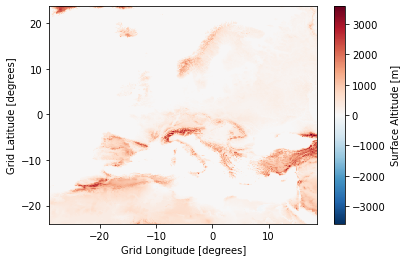

In [25]:
import xarray as xr
ds = xr.open_dataset(filename)
ds.orog.plot()

In [4]:
import cmor

In [5]:
cmor.setup?

Signature:
cmor.setup(
    inpath='.',
    netcdf_file_action=10,
    set_verbosity=21,
    exit_control=21,
    logfile=None,
    create_subdirectories=1,
)
Docstring:
Usage cmor_setup(inpath='.',netcdf_file_action=cmor.CMOR_PRESERVE,set_verbosity=cmor.CMOR_NORMAL,exit_control=cmor.CMOR_NORMAL)
Where:
path:                  Alternate directory where to find tables if not in current directory
netcdf_file_action:    What to do when opening the netcdf file, valid options are:
                       CMOR_PRESERVE, CMOR_APPEND, CMOR_REPLACE, CMOR_PRESERVE_4, CMOR_APPEND_4, CMOR_REPLACE_4, CMOR_PRESERVE_3, CMOR_APPEND_3 or CMOR_REPLACE_3
                       The _3 means netcdf will be created in the old NetCDF3 format (no compression nor chunking), _4 means use NetCDF4 classic format. No _ is equivalent to _3

set_verbosity:         CMOR_QUIET or CMOR_NORMAL
exit_control:          CMOR_EXIT_ON_WARNING, CMOR_EXIT_ON_MAJOR, CMOR_NORMAL
create_subdirectories: 1 to create subdirectories stru

In [93]:
#!/usr/bin/env python
from __future__ import print_function
from test_python_common import *  # common subroutines

import cmor._cmor
import os
import numpy


myaxes = numpy.zeros(9, dtype='i')
myaxes2 = numpy.zeros(9, dtype='i')
myvars = numpy.zeros(9, dtype='i')


cmor.setup(
    inpath = "/Users/lars/python/packages/cmor/cmip6-cmor-tables/Tables",
    set_verbosity=cmor.CMOR_NORMAL,
    netcdf_file_action=cmor.CMOR_REPLACE,
    exit_control=cmor.CMOR_EXIT_ON_MAJOR)
cmor.dataset_json("/Users/lars/python/packages/cmor/Test/CMOR_input_example.json")

tables = []
a = cmor.load_table("/Users/lars/python/packages/cmor/cmip6-cmor-tables/Tables/CMIP6_grids.json")
tables.append(a)

t = 'CMIP6_Omon.json'
te = 'dissic'
u = 'mol m-3'
time = 'time'
ts = 'month'
tscl = 1.

t = 'CMIP6_Lmon.json'
te = 'baresoilFrac'
u = ''
time = 'time'
ts = 'months'
tscl = 3.5e-4


tables.append(cmor.load_table("/Users/lars/python/packages/cmor/cmip6-cmor-tables/Tables/%s" % t))
print('Tables ids:', tables)

cmor.set_table(tables[0])

x, y, lon_coords, lat_coords, lon_vertices, lat_vertices = gen_irreg_grid(
    lon, lat)


myaxes[0] = cmor.axis(table_entry='grid_latitude',
                      units='degrees',
                      coord_vals=y)
myaxes[1] = cmor.axis(table_entry='grid_longitude',
                      units='degrees',
                      coord_vals=x)

grid_id = cmor.grid(axis_ids=myaxes[:2],
                    latitude=lat_coords,
                    longitude=lon_coords,
                    latitude_vertices=lat_vertices,
                    longitude_vertices=lon_vertices)
print('got grid_id:', grid_id)
myaxes[2] = grid_id

mapnm = 'rotated_latitude_longitude'
params = ["standard_parallel1",
          "longitude_of_central_meridian", "latitude_of_projection_origin",
          "false_easting", "false_northing", "standard_parallel2"]
params = ["grid_north_pole_latitude", "grid_north_pole_longitude", "north_pole_grid_longitude"]
punits = ["", "", ""]
pvalues = [-39.25, 162., 0.]
cmor.set_grid_mapping(grid_id=myaxes[2],
                      mapping_name=mapnm,
                      parameter_names=params,
                      parameter_values=pvalues,
                      parameter_units=punits)

cmor.set_table(tables[1])
myaxes[3] = cmor.axis(table_entry=time,
                      units='%s since 1980' % ts)

pass_axes = [myaxes[3], myaxes[2]]

myvars[0] = cmor.variable(table_entry=te,
                          units=u,
                          axis_ids=pass_axes,
                          history='no history',
                          comment='no future'
                          )

ntimes = 2
for i in range(ntimes):
    data2d = read_2d_input_files(i, varin2d[0], lat, lon) * 1.E-6
    print('writing time: ', i, data2d.shape)  # ,data2d
    print(Time[i], bnds_time[2 * i:2 * i + 2])
    cmor.write(myvars[0], data2d, 1, time_vals=Time[i],
               time_bnds=bnds_time[2 * i:2 * i + 2])
    print('wrote')
cmor.close()


Tables ids: [0, 1]
got grid_id: -100
writing time:  0 (3, 4)
0.0 [0. 1.]
wrote
writing time:  1 (3, 4)
1.0 [1. 2.]
wrote



C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_mip_era with value "CMIP6" 
! will be replaced with value "no parent".
! 
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_source_id with value "PCMDI-test-1-0" 
! will be replaced with value "no parent".
! 
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_time_units with value "days since 1850-01-01" 
! will be replaced with value "no parent".
! 
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_variant_label with value "r3i1p1f1" 
! will b

0

In [44]:
Time

array([0., 1.])

In [47]:
ds = pr.tutorial.open_dataset()

In [49]:
ds.FIB

<xarray.DataArray 'FIB' (time: 1, rlat: 121, rlon: 129)>
array([[[ 398.85638 ,  273.42328 , ...,  588.2108  , 1526.9733  ],
        [ 397.97647 ,  443.87238 , ..., 1680.8578  , 1548.631   ],
        ...,
        [   0.      ,    0.      , ...,   42.210724,   23.148695],
        [   0.      ,    0.      , ...,   27.8703  ,   34.436882]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01
  * rlon     (rlon) float64 -31.73 -31.29 -30.85 -30.41 ... 23.71 24.15 24.59
  * rlat     (rlat) float64 -26.73 -26.29 -25.85 -25.41 ... 25.19 25.63 26.07
Attributes:
    grid_mapping:  rotated_pole
    variable:      FIB
    description:   surface geopotential (orography)
    units:         m
    layer:         1.0
    cf_name:       orog
    code:          129

In [57]:
eur44 = pr.remo_domain('EUR-44', dummy='topo', add_vertices=True)
eur44

<xarray.Dataset>
Dimensions:                     (rlon: 129, rlat: 121, vertices: 4)
Coordinates:
  * rlon                        (rlon) float64 -31.73 -31.29 ... 24.15 24.59
  * rlat                        (rlat) float64 -26.73 -26.29 ... 25.63 26.07
    lon                         (rlat, rlon) float64 -11.54 -11.16 ... 82.73
    lat                         (rlat, rlon) float64 17.68 17.85 ... 65.89 65.58
Dimensions without coordinates: vertices
Data variables:
    rotated_latitude_longitude  int32 0
    lat_vertices                (rlat, rlon, vertices) float64 17.79 ... 65.57
    lon_vertices                (rlat, rlon, vertices) float64 -11.82 ... 83.44
    topo                        (rlat, rlon) float32 406.7 292.0 ... 15.67 35.33
Attributes:
    CORDEX_domain:  EUR-44

In [90]:

cmor.setup(
    inpath = "/Users/lars/python/packages/cmor/cmip6-cmor-tables/Tables",
    set_verbosity=cmor.CMOR_NORMAL,
    netcdf_file_action=cmor.CMOR_REPLACE,
    exit_control=cmor.CMOR_EXIT_ON_MAJOR)
cmor.dataset_json("/Users/lars/python/packages/cmor/Test/CMOR_input_example.json")

tables = []
a = cmor.load_table("CMIP6_grids.json")
tables.append(a)


ds = eur44
t = 'CMIP6_fx.json'
te = 'orog'
u = ds.topo.units
time = 'time'
ts = 'months'
tscl = 3.5e-4


tables.append(cmor.load_table("%s" % t))
print('Tables ids:', tables)

cmor.set_table(tables[0])


x = ds.rlon.to_numpy()
y = ds.rlat.to_numpy()
lon_coords = ds.lon.to_numpy()
lat_coords = ds.lat.to_numpy()
lon_vertices = ds.lon_vertices.to_numpy()
lat_vertices = ds.lat_vertices.to_numpy()


myaxes[0] = cmor.axis(table_entry='grid_latitude',
                      units='degrees',
                      coord_vals=y)
myaxes[1] = cmor.axis(table_entry='grid_longitude',
                      units='degrees',
                      coord_vals=x)

grid_id = cmor.grid(axis_ids=myaxes[:2],
                    latitude=lat_coords,
                    longitude=lon_coords,
                    latitude_vertices=lat_vertices,
                    longitude_vertices=lon_vertices)
print('got grid_id:', grid_id)
myaxes[2] = grid_id

mapnm = 'rotated_latitude_longitude'
params = ["standard_parallel1",
          "longitude_of_central_meridian", "latitude_of_projection_origin",
          "false_easting", "false_northing", "standard_parallel2"]
params = ["grid_north_pole_latitude", "grid_north_pole_longitude", "north_pole_grid_longitude"]
punits = ["", "", ""]
pvalues = [-39.25, 162., 0.]
cmor.set_grid_mapping(grid_id=myaxes[2],
                      mapping_name=mapnm,
                      parameter_names=params,
                      parameter_values=pvalues,
                      parameter_units=punits)

cmor.set_table(tables[1])
myaxes[3] = cmor.axis(table_entry=time,
                      units='%s since 1980' % ts)

pass_axes = [myaxes[2]]

myvars[0] = cmor.variable(table_entry=te,
                          units=u,
                          axis_ids=pass_axes,
                          history='no history',
                          comment='no future'
                          )

data2d = ds.topo.to_numpy()
    
cmor.write(myvars[0], data2d)
cmor.close(int(myvars[0]), file_name=True)

Tables ids: [0, 1]
got grid_id: -100



C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! called from: cmor_write
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_mip_era with value "CMIP6" 
! will be replaced with value "no parent".
! 
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! called from: cmor_write
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_source_id with value "PCMDI-test-1-0" 
! will be replaced with value "no parent".
! 
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! called from: cmor_write
! 

!!!!!!!!!!!!!!!!!!!!!!!!!
!
! Warning: Your input attribute parent_time_units with value "days since 1850-01-01" 
! will be replaced with value "no parent".
! 
!
!!!!!!!!!!!!!!!!!!!!!!!!!


C Traceback:
In function: _CV_CompareNoParent
! called from: _CV_checkParentExpID
! called from: cmor_write
! 

!!!!!!!!

'CMIP6/CMIP6/ISMIP6/PCMDI/PCMDI-test-1-0/piControl-withism/r3i1p1f1/fx/orog/gn/v20220405/orog_fx_PCMDI-test-1-0_piControl-withism_r3i1p1f1_gn.nc'

In [78]:
import xarray as xr
ds = xr.open_dataset("CMIP6/CMIP6/ISMIP6/PCMDI/PCMDI-test-1-0/piControl-withism/r3i1p1f1/fx/orog/gn/v20220405/orog_fx_PCMDI-test-1-0_piControl-withism_r3i1p1f1_gn.nc")
ds

<xarray.Dataset>
Dimensions:                     (rlat: 121, rlon: 129, vertices: 4)
Coordinates:
  * rlat                        (rlat) float64 -26.73 -26.29 ... 25.63 26.07
  * rlon                        (rlon) float64 -31.73 -31.29 ... 24.15 24.59
    latitude                    (rlat, rlon) float64 ...
    longitude                   (rlat, rlon) float64 ...
Dimensions without coordinates: vertices
Data variables:
    rotated_latitude_longitude  int32 ...
    vertices_latitude           (rlat, rlon, vertices) float64 ...
    vertices_longitude          (rlat, rlon, vertices) float64 ...
    orog                        (rlat, rlon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ISMIP6
    branch_method:          no parent
    branch_time_in_child:   59400.0
    branch_time_in_parent:  0.0
    contact:                Python Coder (coder@a.b.c.com)
    ...                     ...
    title:                  PCMDI-test-1-0 output prepared for CMIP6
    tracking_id:            hdl:21.14100/d5ed78df-741b-4e0b-a651-9358697d5f50
    variable_id:            orog
    variant_label:          r3i1p1f1
    license:                CMIP6 model data produced by Lawrence Livermore P...
    cmor_version:           3.6.1

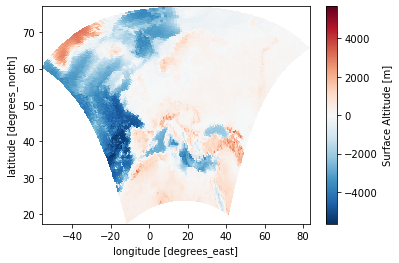

In [79]:
ds.orog.plot(x='longitude', y='latitude')